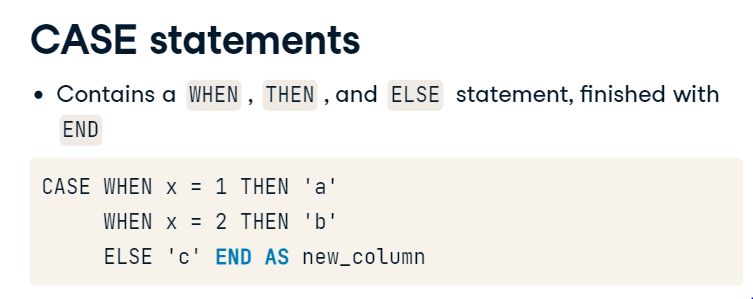
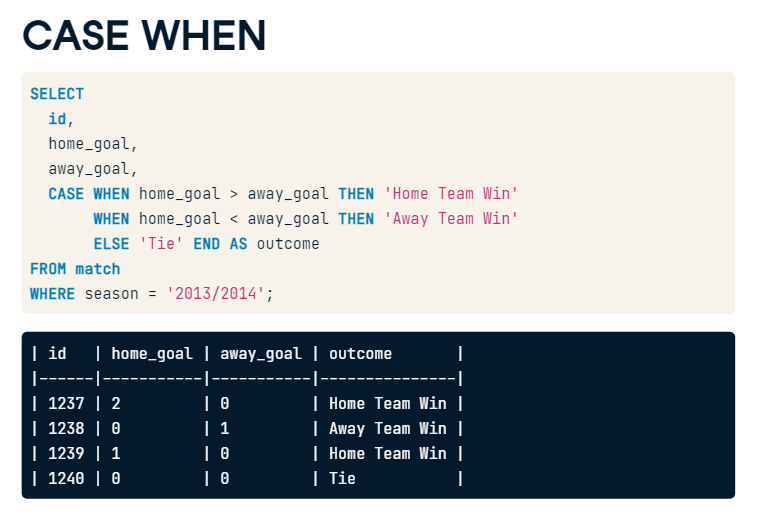
#### Basic CASE statements
What is your favorite team?

The European Soccer Database contains data about 12,800 matches from 11 countries played between 2011-2015! Throughout this course, you will be shown filtered versions of the tables in this database in order to better explore their contents.

In this exercise, you will identify matches played between FC Schalke 04 and FC Bayern Munich. There are 2 teams identified in each match in the hometeam_id and awayteam_id columns, available to you in the filtered matches_germany table. ID can join to the team_api_id column in the teams_germany table, but you cannot perform a join on both at the same time.

However, you can perform this operation using a CASE statement once you've identified the team_api_id associated with each team!

- Select the team's long name and API id from the teams_germany table.
- Filter the query for FC Schalke 04 and FC Bayern Munich using IN, giving you the team_api_IDs needed for the next step.

```sql
SELECT
	-- Select the team long name and team API id
	team_long_name,
	team_api_id	
FROM teams_germany
-- Only include FC Schalke 04 and FC Bayern Munich
WHERE team_long_name IN ('FC Schalke 04','FC Bayern Munich');
```

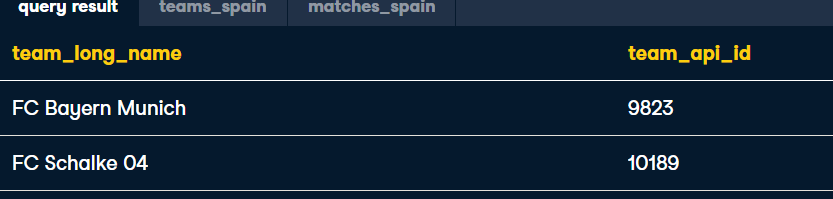


However, you can perform this operation using a CASE statement once you've identified the team_api_id associated with each team!

- Create a CASE statement that identifies whether a match in Germany included FC Bayern Munich, FC Schalke 04, or neither as the home team.
- Group the query by the CASE statement alias, home_team.

```sql
-- Identify the home team as Bayern Munich, Schalke 04, or neither
SELECT 
	CASE WHEN hometeam_id = 10189 THEN 'FC Schalke 04'
        WHEN hometeam_id = 9823 THEN 'FC Bayern Munich'
         ELSE 'Other' END AS home_team,
	COUNT(id) AS total_matches
FROM matches_germany
-- Group by the CASE statement alias
GROUP BY home_team;
```

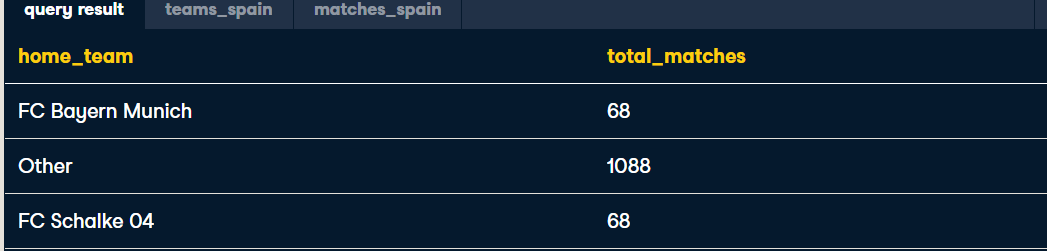


#### CASE statements comparing column values
Barcelona is considered one of the strongest teams in Spain's soccer league.

In this exercise, you will be creating a list of matches in the 2011/2012 season where Barcelona was the home team. You will do this using a CASE statement that compares the values of two columns to create a new group -- wins, losses, and ties.

In 3 steps, you will build a query that identifies a match's winner, identifies the identity of the opponent, and finally filters for Barcelona as the home team. Completing a query in this order will allow you to watch your results take shape with each new piece of information.

The matches_spain table currently contains Barcelona's matches from the 2011/2012 season, and has two key columns, hometeam_id and awayteam_id, that can be joined with the teams_spain table. However, you can only join teams_spain to one column at a time.

- Select the date of the match and create a CASE statement to identify matches as home wins, home losses, or ties.

```sql
SELECT 
	-- Select the date of the match
	date,
	-- Identify home wins, losses, or ties
	CASE WHEN home_goal > away_goal THEN 'Home win :('
        WHEN home_goal < away_goal THEN 'Home loss :D' 
        ELSE 'Tie' END AS outcome
FROM matches_spain;
```


- Left join the teams_spain table team_api_id column to the matches_spain table awayteam_id. This allows us to retrieve the away team's identity.
- Select team_long_name from teams_spain as opponent and complete the CASE statement from Step 1.


```sql
SELECT 
	m.date,
	--Select the team long name column and call it 'opponent'
	t.team_long_name AS opponent, 
	-- Complete the CASE statement with an alias
	CASE WHEN m.home_goal > m.away_goal THEN 'Home win!'
        WHEN m.home_goal < m.away_goal THEN 'Home loss :('
        ELSE 'Tie' END as outcome
FROM matches_spain AS m
-- Left join teams_spain onto matches_spain
LEFT JOIN teams_spain AS t
ON m.awayteam_id = t.team_api_id	;
```

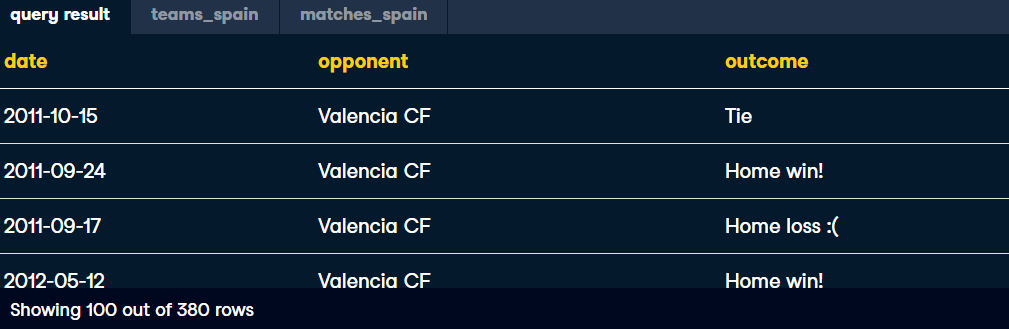

- Complete the same CASE statement as the previous steps.
- Filter for matches where the home team is FC Barcelona (id = 8634).

```sql
SELECT 
	m.date,
	t.team_long_name AS opponent,
    -- Complete the CASE statement with an alias
	CASE WHEN m.home_goal > m.away_goal THEN 'Barcelona win!'
        WHEN m.home_goal < m.away_goal THEN  'Barcelona loss :(' 
        ELSE 'Tie' END AS outcome 
FROM matches_spain AS m
LEFT JOIN teams_spain AS t 
ON m.awayteam_id = t.team_api_id
-- Filter for Barcelona as the home team
WHERE m.hometeam_id = 8634; 
```

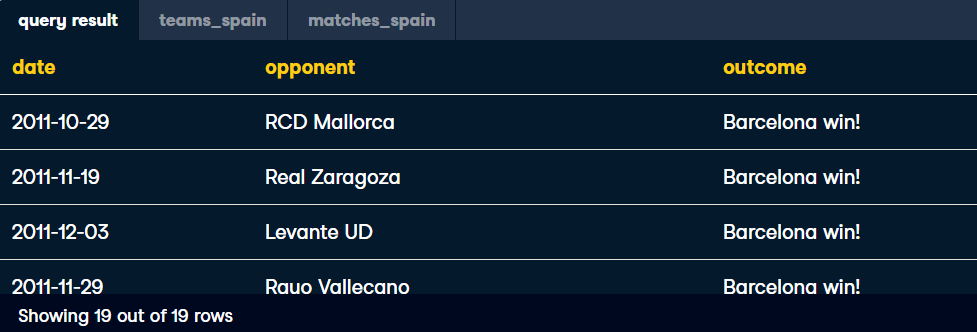


#### CASE statements comparing two column values part 2
Similar to the previous exercise, you will construct a query to determine the outcome of Barcelona's matches where they played as the away team. You will learn how to combine these two queries in chapters 2 and 3.

Did their performance differ from the matches where they were the home team?


- Complete the CASE statement to identify Barcelona's away team games (id = 8634) as wins, losses, or ties.
- Left join the teams_spain table team_api_id column on the matches_spain table hometeam_id column. This retrieves the identity of the home team opponent.
- Filter the query to only include matches where Barcelona was the away team.

```sql
-- Select matches where Barcelona was the away team
SELECT  
	m.date,
	t.team_long_name AS opponent,
	CASE WHEN m.home_goal < m.away_goal THEN 'Barcelona win!'
        WHEN m.home_goal > m.away_goal THEN  'Barcelona loss :(' 
        ELSE 'Tie' END AS outcome
FROM matches_spain AS m
-- Join teams_spain to matches_spain
LEFT JOIN teams_spain AS t 
ON m.hometeam_id = t.team_api_id
WHERE m.awayteam_id = 8634;
```

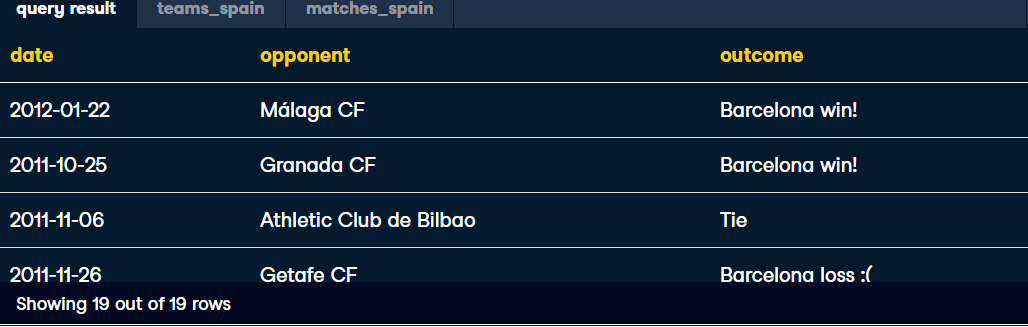

